In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [78]:
df = pd.read_csv('predict.csv')
df.tail(6)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
194,46,F,HIGH,HIGH,34.686,drugY
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

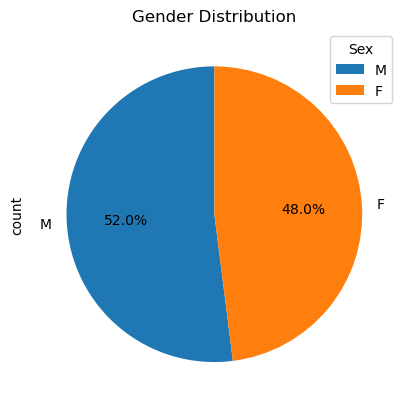

In [19]:
gender_counts = df['Sex'].value_counts()  

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.legend(gender_counts.index, title='Sex')
plt.show()

In [20]:
average_age = df['Age'].mean()
average_age

44.315

In [21]:
max_age = df['Age'].max()
max_age

74

In [22]:
min_age = df['Age'].min()
min_age

15

In [97]:
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])  
df['BP'] = label_encoder.fit_transform(df['BP'])   
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])  

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [98]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]


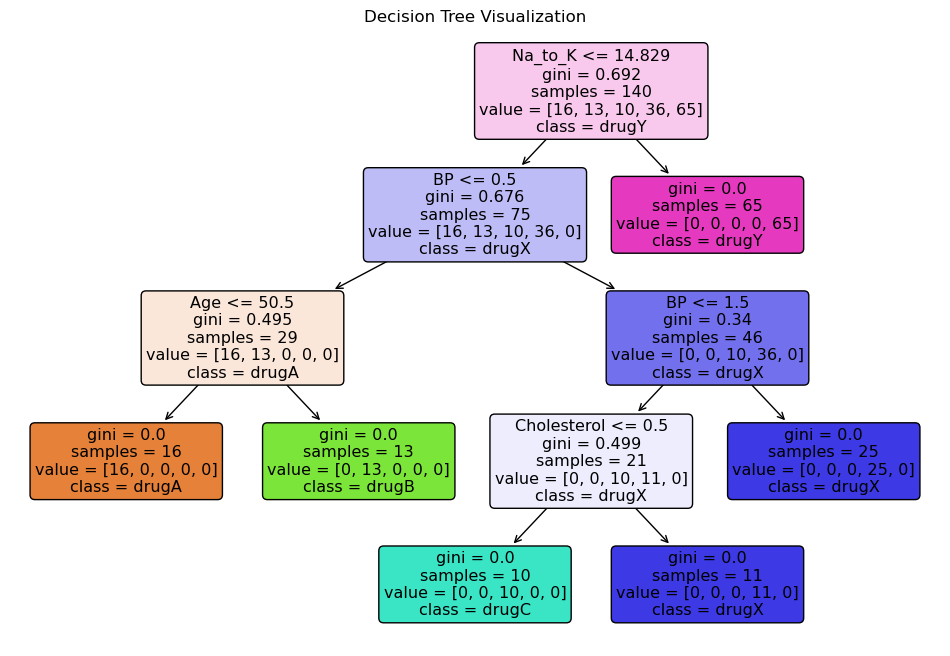

In [74]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, 
          filled=True, 
          feature_names=x.columns.tolist(), 
          class_names=model.classes_.tolist(), 
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [94]:
new_patient_data = {
    'Age': [26],
    'Sex': ['1'],  # 0 = FEMALE, 1 = MALE
    'BP': ['0'],  # 0 = HIGH, 1 = LOW, 2 = NORMAL
    'Cholesterol': ['0'], #1= normal, 0 = high
    'Na_to_K': [34]
}


new_patient_df = pd.DataFrame(new_patient_data)

predicted_drug = model.predict(new_patient_df)

print(f"Predicted Drug for the new patient: {predicted_drug[0]}")

Predicted Drug for the new patient: drugY
